In [1]:
!pip install tensorflow pandas scikit-learn



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

In [3]:
import tensorflow as tf

def call_rmsle(y_true, y_pred):
    # Ensure predictions and true values are positive by adding 1
    y_true = tf.math.maximum(y_true, 0)
    y_pred = tf.math.maximum(y_pred, 0)

    # Compute the logarithm of the true and predicted values
    log_true = tf.math.log1p(y_true)
    log_pred = tf.math.log1p(y_pred)

    # Compute the squared difference
    squared_diff = tf.math.square(log_true - log_pred)

    # Compute the mean of the squared differences
    mean_squared_diff = tf.math.reduce_mean(squared_diff)

    # Return the square root of the mean squared differences
    return tf.math.sqrt(mean_squared_diff)



In [4]:
df_all    = pd.read_csv('./data_dir/wip_data/preprocessed_train_data_v1.csv',index_col=0)

In [5]:
df_all.tail()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,day,day_of_week,week_of_month,week_number,sales
3000883,3000883,2017-08-15,9,28,0,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,438.133
3000884,3000884,2017-08-15,9,29,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,154.553
3000885,3000885,2017-08-15,9,30,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,2419.729
3000886,3000886,2017-08-15,9,31,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,121.000
3000887,3000887,2017-08-15,9,32,0,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,16.000


In [167]:
df    = df_all[(df_all['store_nbr']==3) & (df_all['family']==10)]
df.shape
#df[df['id'].duplicated()]

(1684, 19)

In [168]:
df.columns

# Convert month and day to cyclical features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['wom_sin'] = np.sin(2 * np.pi * df['week_of_month'] / 5)
df['wom_cos'] = np.cos(2 * np.pi * df['week_of_month'] / 5)

df['week_sin'] = np.sin(2 * np.pi * df['week_number'] / 52)
df['week_cos'] = np.cos(2 * np.pi * df['week_number'] / 52)

df['is_weekend'] = df['day_of_week'].isin([0, 6]).astype('int')
df['is_midweek'] = df['day_of_week'].isin([3, 4]).astype('int')
#df['is_sunday'] = df['day_of_week'].isin([0]).astype('int')
#df['is_thursday'] = df['day_of_week'].isin([4]).astype('int')

#removing sales = 0 rows

df = df[df['sales']>0]
df = df[df['IS_HOLIDAY']==0]
df['year'] = df['year']-df['year'].min()


C:\Users\Monil\AppData\Local\Temp\ipykernel_51764\1971518403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
C:\Users\Monil\AppData\Local\Temp\ipykernel_51764\1971518403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
C:\Users\Monil\AppData\Local\Temp\ipykernel_51764\1971518403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [169]:
df.shape


(1539, 29)

In [170]:
df.head(100)

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,day,day_of_week,week_of_month,week_number,sales,month_sin,month_cos,day_sin,day_cos,wom_sin,wom_cos,week_sin,week_cos,is_weekend,is_midweek
2518,2518,2013-01-02,3,10,0,18,12,3,8,4,0.0,93.14,1,0,2,3,1,1,814.0,0.500000,0.866025,0.394356,0.918958,0.951057,0.309017,0.120537,0.992709,0,1
4300,4300,2013-01-03,3,10,0,18,12,3,8,4,0.0,92.97,1,0,3,4,1,1,639.0,0.500000,0.866025,0.571268,0.820763,0.951057,0.309017,0.120537,0.992709,0,1
6082,6082,2013-01-04,3,10,0,18,12,3,8,4,0.0,93.12,1,0,4,5,1,1,538.0,0.500000,0.866025,0.724793,0.688967,0.951057,0.309017,0.120537,0.992709,0,0
9646,9646,2013-01-06,3,10,0,18,12,3,8,4,0.0,93.20,1,0,6,0,1,1,741.0,0.500000,0.866025,0.937752,0.347305,0.951057,0.309017,0.120537,0.992709,1,0
11428,11428,2013-01-07,3,10,0,18,12,3,8,4,0.0,93.20,1,0,7,1,1,2,474.0,0.500000,0.866025,0.988468,0.151428,0.951057,0.309017,0.239316,0.970942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178936,178936,2013-04-11,3,10,0,18,12,3,8,4,0.0,93.44,4,0,11,4,2,15,340.0,0.866025,-0.500000,0.790776,-0.612106,0.587785,-0.809017,0.970942,-0.239316,0,1
180718,180718,2013-04-12,3,10,0,18,12,3,8,4,0.0,91.23,4,0,12,5,2,15,489.0,0.866025,-0.500000,0.651372,-0.758758,0.587785,-0.809017,0.970942,-0.239316,0,0
182500,182500,2013-04-13,3,10,0,18,12,3,8,4,0.0,88.75,4,0,13,6,2,15,637.0,0.866025,-0.500000,0.485302,-0.874347,0.587785,-0.809017,0.970942,-0.239316,1,0
184282,184282,2013-04-14,3,10,0,18,12,3,8,4,0.0,88.75,4,0,14,0,2,15,697.0,0.866025,-0.500000,0.299363,-0.954139,0.587785,-0.809017,0.970942,-0.239316,1,0


In [171]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Features to be scaled # removed 'holiday_type'
features_to_scale = ['oil_price', 'year']
# Features to be left unscaled (those ending with 'sin' or 'cos') # removed 'IS_HOLIDAY', 
features_to_leave = ['onpromotion',  'month_sin','month_cos',
         'day_sin','day_cos',  'wom_sin','wom_cos', 'week_sin','week_cos','is_midweek','is_weekend' ]

features = features_to_scale+features_to_leave
target = 'sales'
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, shuffle=False)

##########Experiment: Allowing data leakage#######
X_train = df[features]
y_train = df[target]
###################################################


# Initialize scalers
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the selected features
X_train_scaled_part = feature_scaler.fit_transform(X_train[features_to_scale])
X_test_scaled_part = feature_scaler.transform(X_test[features_to_scale])

# Combine scaled features with unscaled features (still as NumPy arrays)
X_train_scaled = np.hstack((X_train_scaled_part, X_train[features_to_leave].values))
X_test_scaled = np.hstack((X_test_scaled_part, X_test[features_to_leave].values))

# Scale target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [172]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to fit LSTM input shape (num_samples, timesteps, num_features)
timesteps = 1  # You need to define this based on your data and model requirements
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))



In [173]:
X_train_reshaped.shape[2]

13

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build your CNN-LSTM model
model = Sequential()

# Add a Conv1D layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(timesteps, X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size=1))

# Add LSTM layers (directly after Conv1D without flattening)
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model with RMSLE as the loss function
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=call_rmsle)

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, 
                    validation_data=(X_test_reshaped, y_test_scaled), batch_size=32, callbacks=[early_stopping])


C:\Users\Monil\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1810 - val_loss: 0.0920
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0855 - val_loss: 0.0795
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0833 - val_loss: 0.0786
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0807 - val_loss: 0.0802
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0797 - val_loss: 0.0769
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0800 - val_loss: 0.0785
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0820 - val_loss: 0.0780
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0790 - val_loss: 0.0786


In [175]:

# # Build your LSTM model
# model = Sequential()
# model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, X_train_reshaped.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(256))
# model.add(Dropout(0.2))

# model.add(Dense(1))

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Compile the model with RMSLE as the loss function
# optimizer = Adam(learning_rate=0.005)
# model.compile(optimizer=optimizer, loss=call_rmsle)

# # Train the model
# history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, 
#                     validation_data=(X_test_reshaped, y_test_scaled), batch_size=32,callbacks=[early_stopping])


In [176]:
# Predictions
lstm_predictions = model.predict(X_test_reshaped)

# Ensure both predictions and actual values are of type float64
y_test_scaled = y_test_scaled.reshape(-1, 1).astype('float64')
lstm_predictions_scaled = lstm_predictions.astype('float64')

# Calculate RMSLE
lstm_rmsle_val = call_rmsle(y_test_scaled, lstm_predictions_scaled)

print(f"LSTM RMSLE VAL: {lstm_rmsle_val.numpy()}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
LSTM RMSLE VAL: 0.07754950538964729


In [177]:
val_results_df = pd.DataFrame({
    'Actual': y_test_scaled.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_scaled.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_df.head(10))

     Actual  Predicted
0  0.269865   0.253929
1  0.488756   0.536440
2  0.677661   0.536656
3  0.277361   0.243946
4  0.161919   0.238676
5  0.242879   0.138874
6  0.058471   0.125226
7  0.286357   0.227331
8  0.392804   0.487679
9  0.530735   0.475583


In [178]:
y_test_actual = target_scaler.inverse_transform(y_test_scaled).astype('float64')
lstm_predictions_actual = target_scaler.inverse_transform(lstm_predictions_scaled).astype('float64')

In [179]:
val_results_actual_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_actual.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_actual_df.head(10))

   Actual   Predicted
0   484.0  473.370417
1   630.0  661.805172
2   756.0  661.949328
3   489.0  466.712311
4   412.0  463.197059
5   466.0  396.628726
6   343.0  387.525666
7   495.0  455.629517
8   566.0  629.281777
9   658.0  621.213813


In [180]:
# Calculate the absolute percentage error for each record
val_results_actual_df['Percentage Error'] = (abs(val_results_actual_df['Actual'] - val_results_actual_df['Predicted']) / val_results_actual_df['Actual']) * 100

# Calculate the average percentage error
average_percentage_error = val_results_actual_df['Percentage Error'].mean()

print("Average Percentage Error:", average_percentage_error)

Average Percentage Error: 11.182530580332775


In [181]:
lstm_rmsle_val_actual = call_rmsle(y_test_actual, lstm_predictions_actual)
lstm_rmsle_val_actual

<tf.Tensor: shape=(), dtype=float64, numpy=0.1328896402872523>

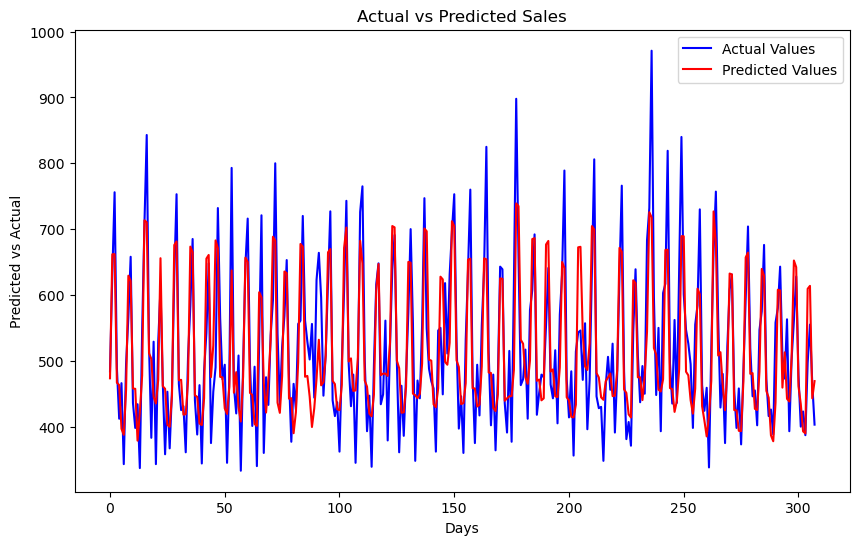

In [182]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='b')
plt.plot(lstm_predictions_actual, label='Predicted Values', color='r')
plt.xlabel('Days')
plt.ylabel('Predicted vs Actual')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

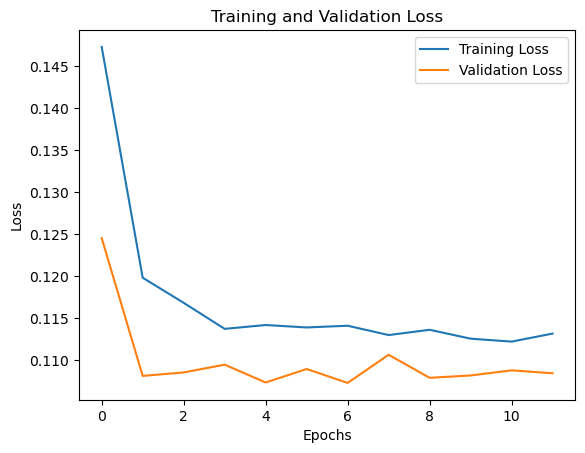

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


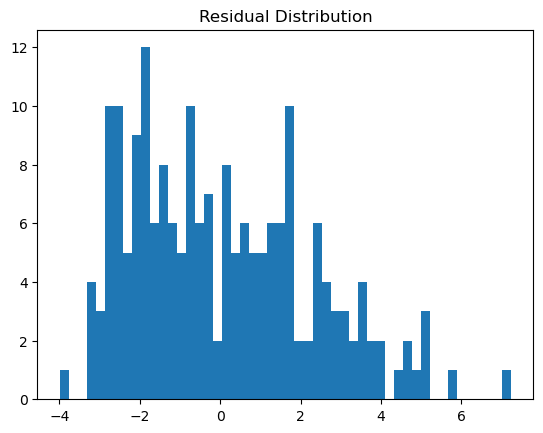

In [28]:
residuals = y_test_actual - lstm_predictions_actual
plt.hist(residuals, bins=50)
plt.title('Residual Distribution')
plt.show()
